In [1]:
import pandas as pd
df = pd.read_csv("onlinefraud_1.csv")
pd.options.display.float_format = '{:.2f}'.format
r = df['isFraud'].value_counts()[1]/len(df)
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [3]:
missing_values = df.isnull().sum()
print(missing_values)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


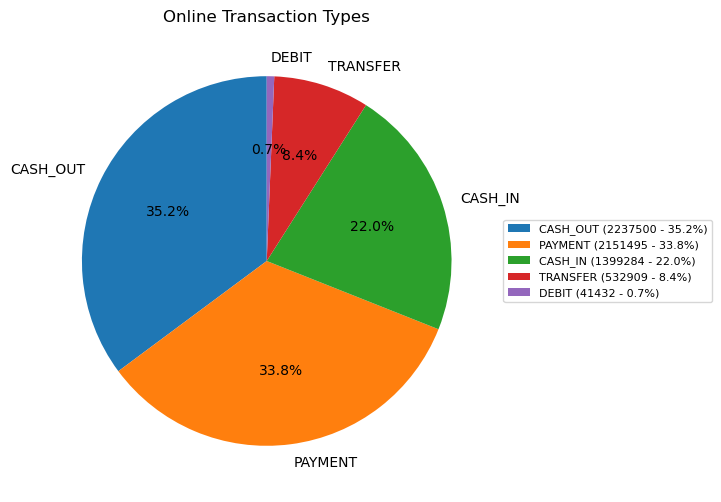

In [4]:

'''

This cell is from Alex and modified by Xinwen
This part aims to build a bar chart for different types

'''
import pandas as pd
import matplotlib.pyplot as plt


# Calculate value counts and percentages
value_counts = df['type'].value_counts()
percentages = 100 * value_counts / len(df['type'])

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)

# Add percentage and value count labels
plt.gca().set_aspect('equal')  # Ensure the pie chart is circular
plt.gca().set_title("Online Transaction Types")

# Create a legend showing both percentage and value count
legend_labels = [f'{index} ({value_counts[index]} - {percentages[index]:.1f}%)' for index in value_counts.index]
plt.legend(legend_labels,loc="center left", bbox_to_anchor=(1, 0.5), fontsize=8)

# Show the chart
plt.show()
plt.show()

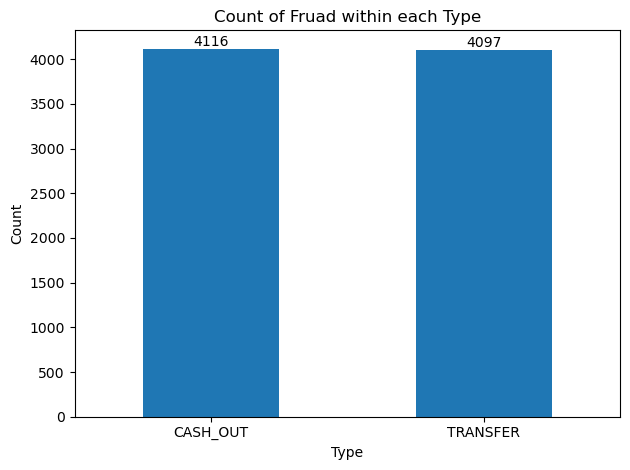

In [5]:
fraud_records = df[df['isFraud'] ==1]
grouped = fraud_records.groupby('type').size()

# Plotting the grouped data
ax = grouped.plot(kind='bar')

# Add count values on top of each bar
for i, v in enumerate(grouped):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Fruad within each Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


# Show the plot
plt.tight_layout()
plt.show()

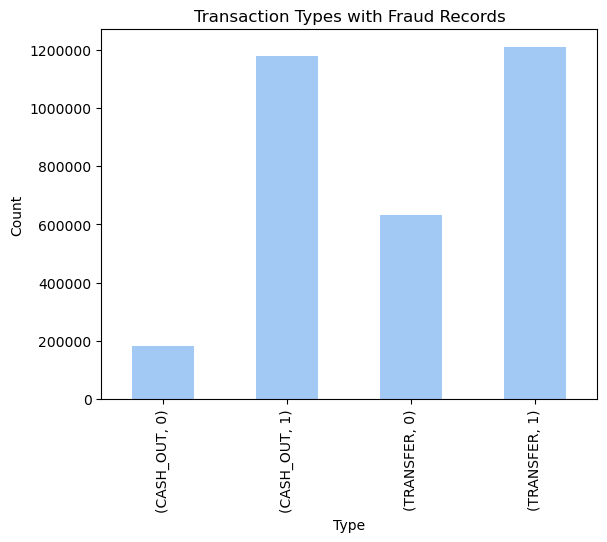

In [29]:

'''

This cell is from Alex
This part aims to see distributions of fraud records

'''


from matplotlib.ticker import FuncFormatter

axes = df[(df['type'] == 'CASH_OUT') | (df['type'] == 'TRANSFER')].groupby(['type', 'isFraud']).amount.mean().plot(kind='bar', ylabel='amount')

def scientific(x, pos):
    # x:  tick value - ie. what you currently see in yticks
    # pos: a position - ie. the index of the tick (from 0 to 9 in this example)
    return '%d' % x

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Transaction Types with Fraud Records')

scientific_formatter = FuncFormatter(scientific)
axes.yaxis.set_major_formatter(scientific_formatter)

In [30]:
# Here we can see that fraud data only exist in two types of transaction: CASH_OUT and TRANSFER
# This means that we should not take too much account on the rest of three types as fraud does not usually happen in these types

In [31]:

'''

This cell is originally from Alex and then combined by Xinwen

This part aims to drop those records where oldbalanceDest is bigger than newbalanceDest while the type is not CASH-IN
in CASH-IN type, the original person should be the one who receives money from destination person, so the old balance of DEST-person should be bigger
in other types, the original person should be the onw who pays money to the destination person, so the old balance of DEST-person should be smaller

'''


'''
# find the records where old balance of Dest-person is bigger than the new balance while the transaction type is not CASH_IN 
not_cash_in = df[(df['oldbalanceDest'] > df['newbalanceDest']) & (df['type'] != 'CASH_IN')]
df = df.drop(not_cash_in.index)
df.describe()

'''

"\n# find the records where old balance of Dest-person is bigger than the new balance while the transaction type is not CASH_IN \nnot_cash_in = df[(df['oldbalanceDest'] > df['newbalanceDest']) & (df['type'] != 'CASH_IN')]\ndf = df.drop(not_cash_in.index)\ndf.describe()\n\n"

In [32]:
'''

This cell is originally from Alex and then combined by Xinwen

This part aims to drop those records where the transferring amount does not equal to the difference of old and new balance of the orig-person but the balance of the Dest-person 
changes and the value of isFruad = 0 at the same time
This means that these records are kind of suspecious as this transaction shouldn't be able to go through

'''

'''

not_right_transferring_amount = df[(df['amount'] != (df['oldbalanceOrg'] - df['newbalanceOrig'])) & (df['newbalanceDest'] != df['oldbalanceDest']) & (df['isFraud'] == 0)]
df = df.drop(not_right_transferring_amount.index)
df.describe()

'''

"\n\nnot_right_transferring_amount = df[(df['amount'] != (df['oldbalanceOrg'] - df['newbalanceOrig'])) & (df['newbalanceDest'] != df['oldbalanceDest']) & (df['isFraud'] == 0)]\ndf = df.drop(not_right_transferring_amount.index)\ndf.describe()\n\n"

In [33]:
'''

Following parts are finished by Xinwen

'''

'\n\nFollowing parts are finished by Xinwen\n\n'

In [6]:
# From this part on, we got a new data set and named it as fraud_data
# First take a look at the current dataset after previous steps

pd.options.display.float_format = '{:.2f}'.format
fraud_data = df
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [7]:
# as you can see, the data set is siginificantly scaled down to 402376 rows

In [8]:

# check the ratio of fraud data in each type with new data set
# note: if you check the same ratio in the original data set, there is a similar result that the ratio of fraud data in CASH_OUT roughly equals to the figure in TRANSFER type
# note: this means the previous steps didn't change the distribution of fraud data much
ratio = (fraud_data['isFraud'] == 1).mean()
print('Ratio of fraud records:', ratio)

is_Fraud_counts = fraud_data.groupby('type')['isFraud'].sum()

ratios_by_type = is_Fraud_counts / len(fraud_data)

print('Ratio of fraud records by type:')
print(ratios_by_type.to_string(float_format='%.9f'))



Ratio of fraud records: 0.001290820448180152
Ratio of fraud records by type:
type
CASH_IN    0.000000000
CASH_OUT   0.000646903
DEBIT      0.000000000
PAYMENT    0.000000000
TRANSFER   0.000643917


In [9]:
category_counts = fraud_data['type'].value_counts(normalize=True) * 100
print(category_counts)

CASH_OUT   35.17
PAYMENT    33.81
CASH_IN    21.99
TRANSFER    8.38
DEBIT       0.65
Name: type, dtype: float64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# define the function of box plot
def draw_boxplot(data, cols):
    fig, axs = plt.subplots(nrows=1, ncols=len(cols), figsize=(15,5))

    for i, col in enumerate(cols):
        sns.boxplot(y=data[col], ax=axs[i])
        axs[i].set_title(f'Boxplot of {col}',y=1.05)
    
    plt.tight_layout()
    # Show the combined plot
    plt.show()

In [11]:
def draw_density_distribution(data, cols):
    fig, axs = plt.subplots(nrows=1, ncols=len(cols), figsize=(15,5))

    for i, col in enumerate(cols):
        sns.kdeplot(data=data, x=col, ax=axs[i])
        axs[i].set_title(f'Density of {col}',y=1.05)

    fig.tight_layout()
    plt.show()

In [12]:
def random_drop_records(data,col,group,ratio):

    num_of_group = len(data[data[col] == group])

    # Calculate the number of records to exclude
    num_to_exclude = int(num_of_group * ratio )

    # Randomly exclude the records
    exclude_indices = data[data[col] == group].sample(num_to_exclude, random_state=42).index
    data_excluded = data.drop(exclude_indices)
    return data_excluded

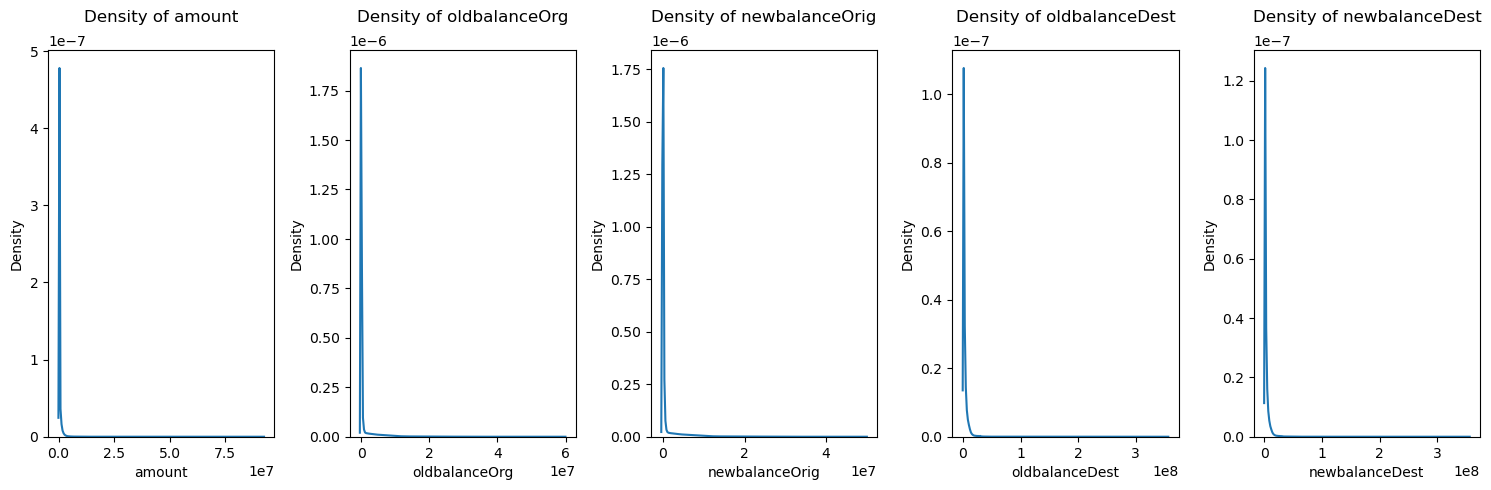

In [16]:
cols = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
# show the density distribution of all numeric columns
draw_density_distribution(fraud_data,cols)

Boxplot for CASH_IN:


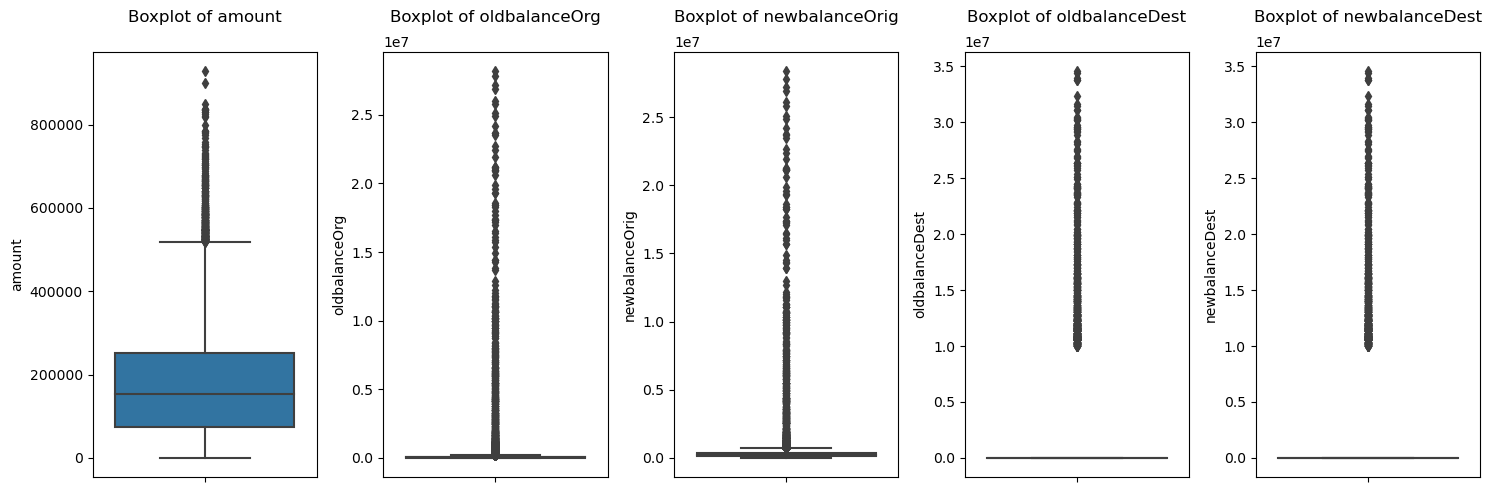


Boxplot for CASH_OUT:


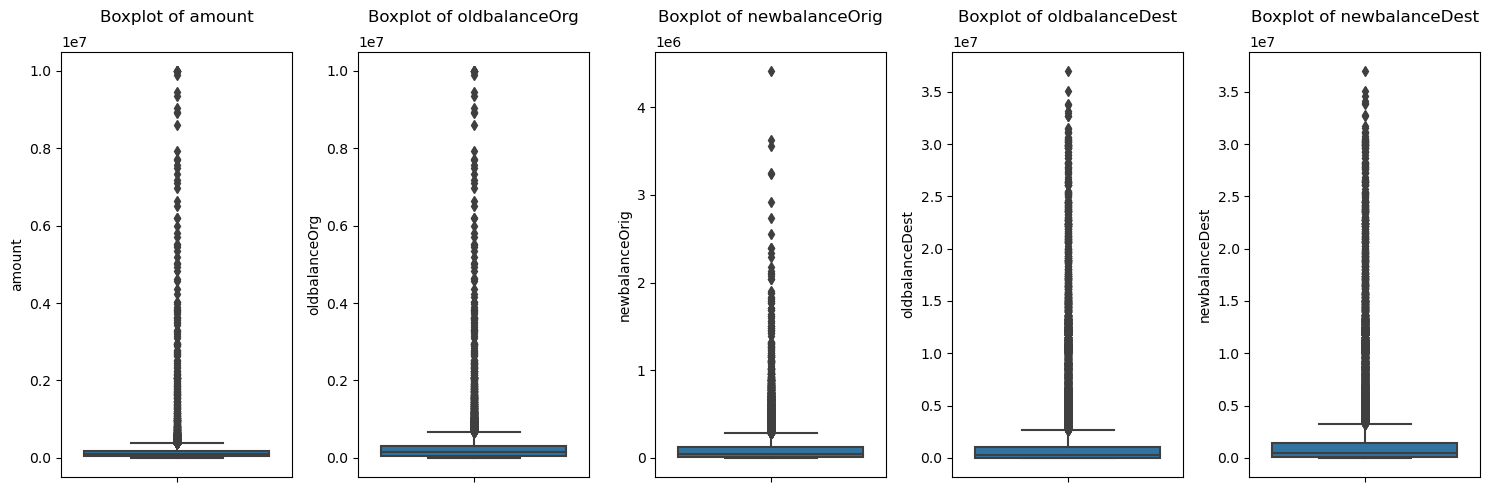


Boxplot for DEBIT:


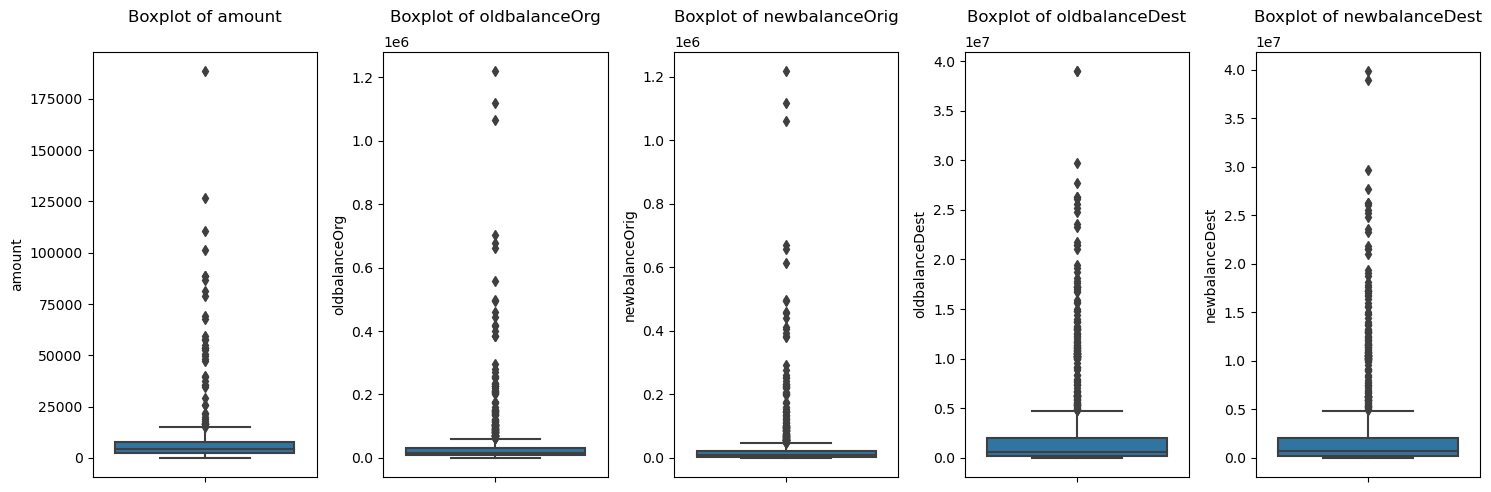


Boxplot for PAYMENT:


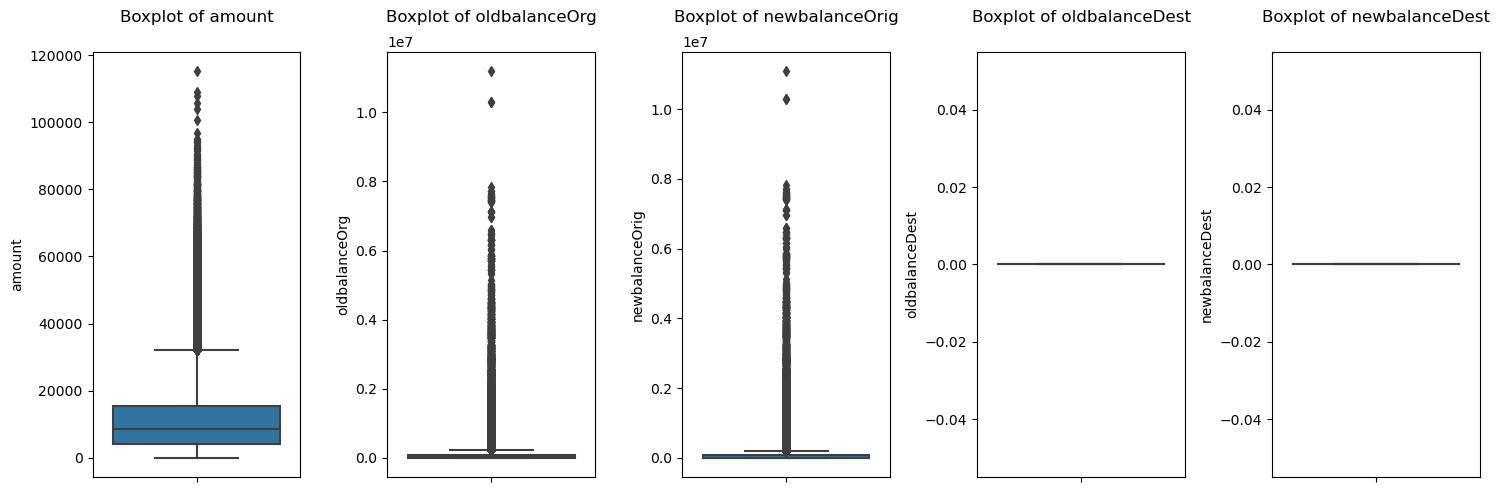


Boxplot for TRANSFER:


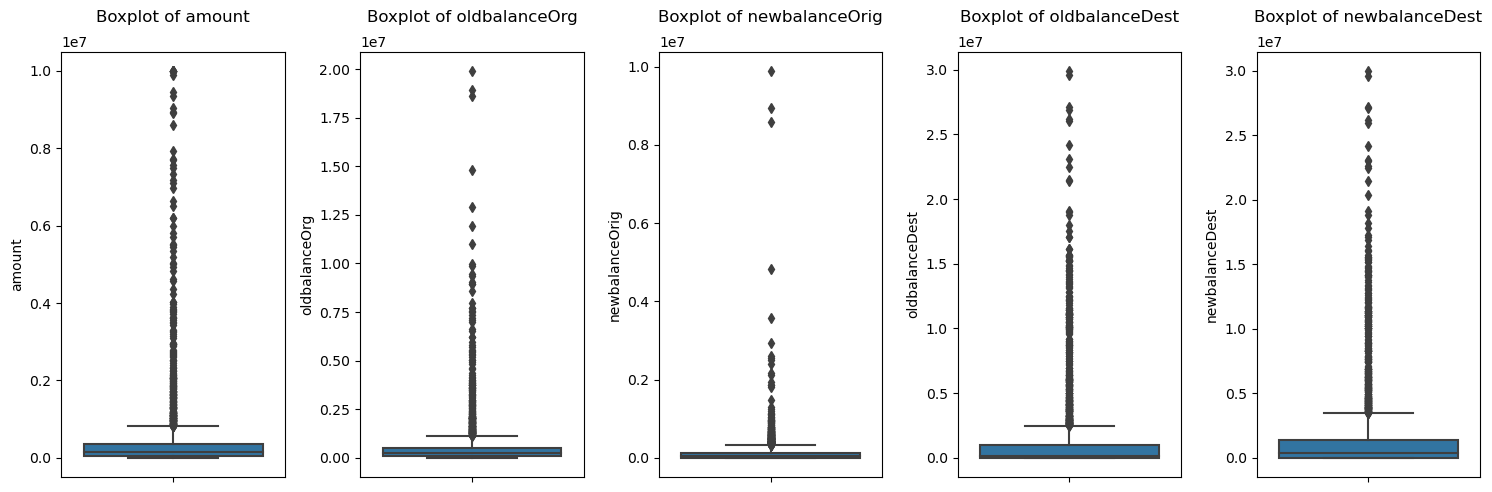

In [43]:

grouped_data = fraud_data.groupby('type')

# draw a boxplot for each type of transaction
for group_name, group_data in grouped_data:
    print('Boxplot for {}:'.format(group_name))
    draw_boxplot(group_data,cols)
    print()


In [44]:
# density distribution and box plot shows that data is highly skewed and a lot of outliers exist, but this might be normal in real transaction records as extreme big values are rare but still important to keep for analysis
# since the PAYMENT data is much more than other types, and there is no fraud records in this type
# here, I randomly drop records in type 'PAYMENT' with a ratio of 0.9, as this type of records is too large while no fraud records
fraud_excluded_payment = random_drop_records(fraud_data,'type','PAYMENT',0.95) 
fraud_excluded_payment.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,66197.00,66197.00,66197.00,66197.00,66197.00,66197.00,66197.00,66197.00
mean,27.91,129223.36,194886.22,191152.12,698427.59,777794.03,0.02,0.00
std,15.86,327785.82,792964.22,726388.47,2702204.70,2746462.29,0.13,0.00
min,1.00,0.37,0.00,0.00,0.00,0.00,0.00,0.00
25%,15.00,13615.92,10842.00,9652.92,0.00,0.00,0.00,0.00
50%,21.00,64603.48,50909.00,75828.63,0.00,0.00,0.00,0.00
75%,40.00,174734.59,187484.20,221589.46,69774.53,242567.67,0.00,0.00
max,95.00,10000000.00,28200000.00,28400000.00,39000000.00,39900000.00,1.00,0.00


In [47]:
# the number of rows is significantly scaled down to 66197
category_counts = fraud_excluded_payment['type'].value_counts(normalize=True) * 100
print(category_counts)

# after scaling down, the dataset is still similarly distributed in the way of ratio of each type of data

CASH_IN    34.33
CASH_OUT   33.46
PAYMENT    26.73
TRANSFER    3.96
DEBIT       1.52
Name: type, dtype: float64


In [48]:
ratio = (fraud_excluded_payment['isFraud'] == 1).mean()
print('Ratio of fraud records:', ratio)

is_Fraud_counts = fraud_excluded_payment.groupby('type')['isFraud'].sum()

ratios_by_type = is_Fraud_counts / len(fraud_excluded_payment)

print('Ratio of fraud records by type:')
print(ratios_by_type.to_string(float_format='%.9f'))


Ratio of fraud records: 0.016934302158708097
Ratio of fraud records by type:
type
CASH_IN    0.000000000
CASH_OUT   0.008429385
DEBIT      0.000000000
PAYMENT    0.000000000
TRANSFER   0.008504917


In [25]:
'''
# the ratio of fraud data increases as we dropped a large number of records which are in a type with no fraud
# our final dataset will be generated as:
fraud_excluded_payment.to_csv('cleaned_data_set.csv', index=False)
'''